In [2]:
import pandas as pd
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats


In [3]:
# Define the pattern to match the files
pattern = 'scraped_data_*.csv'

# Get a list of all the files matching the pattern
files = glob.glob(pattern)

# Check if there are any files to process
if files:
    # Combine all files into a single DataFrame
    combined_df = pd.concat([pd.read_csv(file) for file in files])

    # Group by 'l1_block' and sum the 'txns' column
    df = combined_df.groupby('l1_block')['Txn'].sum().reset_index()

    # Display the result
    df

In [4]:
blocks = pd.read_csv("1txhash_datalength.csv")
df.rename(columns={"l1_block":"tx_hash"}, inplace=True)
blocks.rename(columns={"hash":"tx_hash"}, inplace=True)

In [5]:
df1 = pd.merge(df, blocks, on="tx_hash", how="inner")

In [6]:
df1['bytes_per_tx'] = df1['data_length'] / df1['Txn']
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1.dropna(inplace=True)

/var/folders/71/447v2sxs6p38v1f_31zf3x3r0000gn/T/ipykernel_10217/4114604723.py:7: RuntimeWarning: divide by zero encountered in divide
  return a / (np.power(x, b)) + c
/var/folders/71/447v2sxs6p38v1f_31zf3x3r0000gn/T/ipykernel_10217/4114604723.py:7: RuntimeWarning: overflow encountered in divide
  return a / (np.power(x, b)) + c


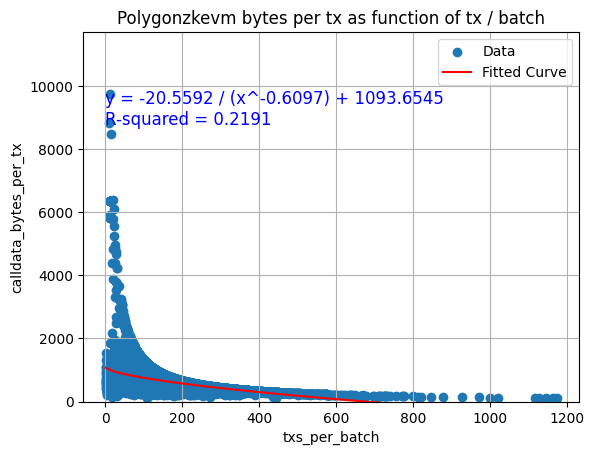

Fitted parameters: a = -20.5592, b = -0.6097, c = 1093.6545
Fitted equation: y = -20.5592 / (x^-0.6097) + 1093.6545
R-squared value: 0.2191


In [80]:

# Sample data (replace with your actual data)
x_data = df1['Txn'].values
y_data = df1['bytes_per_tx'].values

# Define the model function (y = a / (x^b) + c)
def model(x, a, b, c):
    return a / (np.power(x, b)) + c

# Perform the curve fit
params, covariance = curve_fit(model, x_data, y_data, maxfev=1000000)  # maxfev is increased for better convergence

# Extract the fitted parameters
a_fit, b_fit, c_fit = params

# Generate y-values for the fitted curve
y_fit = model(x_data, a_fit, b_fit, c_fit)

# Calculate the R-squared value
slope, intercept, r_value, p_value, std_err = stats.linregress(y_data, y_fit)
r_squared = r_value**2

# Create a scatter plot of the data
plt.scatter(x_data, y_data, label='Data')

# Plot the fitted curve
x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit_curve = model(x_fit, a_fit, b_fit, c_fit)
plt.plot(x_fit, y_fit_curve, label='Fitted Curve', color='r')

# Calculate the fitted equation
equation = f'y = {a_fit:.4f} / (x^{b_fit:.4f}) + {c_fit:.4f}'

# Set y-axis limit (you can adjust this)
plt.ylim(0, max(y_data) * 1.2)

# Add the equation and R-squared value as text annotations on the plot
text_equation = f'{equation}\nR-squared = {r_squared:.4f}'
plt.text(0.1, max(y_data) * 0.9, text_equation, fontsize=12, color='b')

# Add legend
plt.legend()

# Set labels and title
plt.xlabel('txs_per_batch')
plt.ylabel('calldata_bytes_per_tx')
plt.title('Polygonzkevm bytes per tx as function of tx / batch')
plt.grid(True)

# Show the plot
plt.show()

# Display the fitted parameters, equation, and R-squared value
print(f"Fitted parameters: a = {a_fit:.4f}, b = {b_fit:.4f}, c = {c_fit:.4f}")
print(f"Fitted equation: {equation}")
print(f"R-squared value: {r_squared:.4f}")


In [11]:
df1[(df1['Txn'] < 200) & (df1['bytes_per_tx'] < 2000)]

,tx_hash,Txn,data_length,bytes_per_tx
2,0x00065c4c99520f854cc125733a051dac44ec64a05792...,129,119940,929.767442
8,0x00182e331a5a936d931a6ca20d77097aba790e928672...,141,126884,899.886525
12,0x00225cb2777148f2b000789c2579286e86e2fe34f5d1...,6,3428,571.333333
13,0x0022bffefa189612c0751cf17647316e345ca8bb0183...,24,16260,677.500000
14,0x0025c1556f67af67c297b740a418933e6c89cc94c954...,177,130020,734.576271
...,...,...,...,...
30980,0xffde22a805c875fdb1fda4776a44e4c7591038ac5a1b...,62,32132,518.258065
30985,0xffe939a8421c7e29c6a2bfd1cc41173e97d2433a5425...,122,66724,546.918033
30990,0xfff35847e009c936afb91d96f54ca05013dab4a94174...,142,130020,915.633803
30991,0xfff83038d7237ea45466fdaf0e2e3f93d3a313630165...,53,27844,525.358491
